In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

The dataset I am working with is pre-split into two files, one that contains the training dataset and one that contains the independent dataset. Up to this point, I have been working exclusively with the training dataset for exploratory data analysis and statistical inference. However, rather than using only the training set to train various classifiers, I have instead decided to combine the training and independent datasets into one dataframe so that I can then create my own train/test splits on the data forhyperparameter tuning, cross-validation and assessment. The following table shows the first five rows of the resulting combined dataframe of the raw gene expression data, with the individual genes as the columns and the patient samples as the rows. Overall, there are 7129 genes and 72 samples; however, I will only be working with a small subset of the genes for the subsequent analyses.

In [2]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot defaults
sns.set()                       # sets default plot style
pd.set_option('display.max_columns', 50)
sns.set_context("paper")        # sets default plot context
plt.rc('figure', figsize=(16,8))# sets default figure size
plt.rc('font', size=16)         # controls default text sizes
plt.rc('axes', titlesize=18)    # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc(['xtick', 'ytick'], labelsize=12)   # fontsize of the tick labels
plt.rc('legend', fontsize=16)   # fontsize of the legend labels

# Read the training dataset into a pandas DataFrame from the 'data_set_ALL_AML_train.csv' file
file = 'data_set_ALL_AML_train.csv'
data_train = pd.read_csv(file, index_col=1)
key = pd.read_csv('actual.csv', index_col=0)

# Remove 'call' columns from DataFrame
drop_list = ['call'] + ['call.' + str(x) for x in range(1,38)]
data_train = data_train.drop(columns=drop_list)

# Remove microarray controls (indicated by 'AFFX') from DataFrame rows
controls = []
for entry in data_train.index:
    if 'AFFX' in entry:
        controls.append(entry)
controls.append('hum_alu_at')
data_train = data_train.drop(labels=controls, axis=0)

# Drop the 'Gene Description' column as it is not useful here
data_train = data_train.drop(['Gene Description'], axis=1)

# Map the column entries to integers and sort the index
data_train.columns = data_train.columns.map(int)
data_train.sort_index(axis=1, inplace=True)

# Transpose rows and columns so that each column is a different gene
gene_data_train = data_train.transpose()

In [3]:
# Read the independent dataset into a pandas DataFrame from the 'data_set_ALL_AML_independent.csv' file
data_indepen = pd.read_csv('data_set_ALL_AML_independent.csv', index_col=1)

# Clean up independent dataset as done with the training dataset
drop_list_2 = ['call'] + ['call.' + str(x) for x in range(1,34)]
data_indepen = data_indepen.drop(columns=drop_list_2)
data_indepen = data_indepen.drop(labels=controls, axis=0)
data_indepen = data_indepen.drop(['Gene Description'], axis=1)
data_indepen.columns = data_indepen.columns.map(int)
data_indepen.sort_index(axis=1, inplace=True)

# Transpose the independent dataset so that rows are the different genes and columns are the patient samples
gene_data_indepen = data_indepen.transpose()

# Concatenate the gene expression data in the training and independent datasets into one dataframe
gene_data = pd.concat([gene_data_train, gene_data_indepen], axis=0)
gene_data = gene_data.astype(float)

gene_data_train.head()

Gene Accession Number,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,AB000466_at,AB000467_at,AB000468_at,AB000584_at,AB000895_at,AB000896_at,AB000897_at,AB000905_at,AB001106_at,AB001325_at,AB002314_at,AB002315_at,AB002318_at,AB002365_at,AB002366_at,...,Z34822_f_at,U87593_f_at,U88902_cds1_f_at,AC002076_cds2_at,D64015_at,HG2510-HT2606_at,L10717_at,L34355_at,L78833_cds4_at,M13981_at,M21064_at,M93143_at,S78825_at,U11863_at,U29175_at,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,151,72,281,36,-299,57,186,1647,137,803,-894,-632,378,-26,-691,2,-156,155,355,1149,-131,158,1084,87,125,...,-325,-67,346,-68,229,-14,108,28,349,61,273,384,-306,-1827,1582,185,511,-125,389,-37,793,329,36,191,-37
2,263,21,250,43,-103,169,219,2043,188,756,-812,-700,249,-242,-369,-14,-98,131,431,941,-95,328,1215,53,-81,...,-191,-88,290,14,194,56,303,-242,214,-28,143,231,-336,-2380,624,169,837,-36,442,-17,782,295,11,76,-14
3,88,-27,358,42,142,359,237,1997,91,2514,-1715,-603,362,-31,-1385,-374,-213,270,603,1924,94,301,1281,128,70,...,-258,9,220,-58,294,95,143,-25,464,513,238,720,-204,-1772,753,315,1199,33,168,52,1138,777,41,228,-41
4,484,61,118,39,-11,274,245,2128,-82,1489,-969,-909,266,-181,-900,-237,-156,115,255,1078,-24,238,1316,112,41,...,-357,45,430,-35,128,42,22,-131,342,142,277,307,-320,-2022,743,240,835,218,174,-110,627,170,-50,126,-91
5,118,16,197,39,237,311,186,1608,204,322,-444,-254,554,16,-58,-78,-95,45,569,501,-15,181,296,-39,-1,...,-78,29,159,18,71,42,44,-33,159,71,134,178,-182,-179,626,156,649,57,504,-26,250,314,14,56,-25


Through earlier exploratory and statistical data analysis, I identified a subset of 50 genes to use as starting features for training machine learning models and created a file containing a variety of statisical information, including an estimate of correlation between each gene and the cancer type, for each of the 50 genes. I created a summary file containing summary statistics for each of the 7129 genes during previous analysis sorted by the calculated correlation value. I have imported this file and extracted the top 25 genes with the highest correlation for each cancer type; the first 25 rows have the largest negative correlation values and correspond to the genes most correlated with AML cancer, while the last 25 rows have the largest positive correlation values and correspond to the genes most correlated with ALL cancer. Using the new dataframe containing summary statistics for the top 50 genes, I created a list containing just the genes names. Finally, I then used this list to slice out the expression data for these genes from the dataframe containing all of the gene expression data to use as my feature data (X) for subsequent machine learning.

I have also merged the gene expression dataframe with the file containing the labels for cancer type (ALL or AML) to create the labeled data, and then extracted the 'cancer' column to use as the labels (y) for training and testing.

In [4]:
# Read in 'gene_summary.csv' file created earlier, which contains gene correlation values
gene_summary = pd.read_csv('gene_summary.csv')
gene_summary.rename({"Unnamed: 0": "Gene"}, axis=1, inplace=True)

# Slice out top 25 genes with highest (+) correlation values and highest (-) correlation values
top_50_gene_summary = pd.concat([gene_summary.iloc[0:25, :], gene_summary.iloc[-25:, :]], axis=0).reset_index(drop=True)
# Create a list with the names of the top 50 genes
top_50_gene_names = list(top_50_gene_summary['Gene'])

gene_summary.head()

,Gene,ALL_mean,AML_mean,ALL_stdev,AML_stdev,mean_diff,std_sum,correlation
0,M55150_at,810.296296,1836.272727,338.178471,360.886434,-1025.976431,699.064905,-1.467641
1,U50136_rna1_at,977.777778,2562.181818,324.689003,789.747785,-1584.404040,1114.436788,-1.421708
2,X95735_at,349.888889,3023.636364,395.515567,1506.464687,-2673.747475,1901.980255,-1.405770
3,M16038_at,375.370370,1811.636364,240.297436,953.688238,-1436.265993,1193.985673,-1.202917
4,M23197_at,175.037037,767.272727,84.092660,411.098307,-592.235690,495.190967,-1.195974


In [5]:
# Slice out expression data for top 50 genes from training dataset
X_train = gene_data_train.loc[:, top_50_gene_names]

# Merge with key dataframe to label data
labeled_data_train = pd.concat([key, gene_data_train], axis=1, join='inner')
y_train = labeled_data_train.cancer

def corr_value(data1, data2):
    """Calculate correlation value"""
    
    corr_value = (np.mean(data1) - np.mean(data2)) / (np.std(data1, ddof=1) + np.std(data2, ddof=1))
    return corr_value

def fit_correlation_classifier(X, y):
    """Train classifier using labeled data and return dictionary containing the correlation and mean for each gene"""
    # Extract unique classes from y and split samples into classes
    classes = np.unique(y)
    class_1, class_2 = classes[0], classes[1]
    class_1_samples = [index for index, value in y.iteritems() if value == class_1]
    class_2_samples = [index for index, value in y.iteritems() if value == class_2]
    
    # Initiate dictionary of weights
    weights = {}
    
    # Iterate through each gene in X and calculate mean and correlation value
    for gene, data in X.iteritems():
        mean = (np.mean(data[class_1_samples]) + np.mean(data[class_2_samples])) / 2
        correlation = corr_value(data[class_1_samples], data[class_2_samples])
        weights[gene] = (correlation, mean)

    # Return the dictionary
    return weights

def predict_correlation_classifier(X, weights):
    "Determine label by calculating weighted vote total, then return list of labels and prediction scores for each sample"
    labels, pred_scores = [], []
    for sample, data in X.iterrows():
        votes_all = []
        votes_aml = []
        for gene, value in data.iteritems():
            w, b = weights[gene]
            vote = w * (value - b)
            if vote >= 0:
                votes_all.append(vote)
            else:
                votes_aml.append(vote)
        final_vote = sum(votes_all) + sum(votes_aml)
        V_all = sum(votes_all)
        V_aml = abs(sum(votes_aml))
        if final_vote >= 0:
            label = 'ALL'
            pred_score = (V_all - V_aml) / (V_all + V_aml)
        else:
            label = 'AML'
            pred_score = (V_aml - V_all) / (V_all + V_aml)
        labels.append(label)
        pred_scores.append(pred_score)
    y_pred = pd.DataFrame(data={'label': labels, 'pred_score': pred_scores}, index=X.index)
    return y_pred

def score_corr_classifier(y_pred, y_test):
    "Calculate accuracy of classifier predictions"
    right, wrong = 0, 0
    for i in range(len(y_test)):
        if y_test.iloc[i] == y_pred.iloc[i, 0]:
            right += 1
        else: wrong += 1
    score = (right / len(y_pred))
    return score, right, wrong
    
# Train the classifier and save correlation and mean data as a dictionary
weights = fit_correlation_classifier(X_train, y_train)

# Predict labels on training set to validate classifier
labels_train = predict_correlation_classifier(X_train, weights)
score_train, correct_train, incorrect_train = score_corr_classifier(labels_train, y_train)
print("Validation on training set yielded an accuracy of {:.2%}".format(score_train))
print('In the training set,', correct_train, 'out of', (correct_train + incorrect_train), 'samples were predicted correctly.\n')
print(pd.concat([y_train, labels_train], axis=1))

# Slice out expression data for top 50 genes from independent dataset
X_test = gene_data_indepen.loc[:, top_50_gene_names]

# Generate labels for independent dataset
labeled_data_indepen = pd.concat([key, gene_data_indepen], axis=1, join='inner')
y_test = labeled_data_indepen.cancer

# Predict labels for independent dataset
y_pred = predict_correlation_classifier(X_test, weights)
#print(y_pred)

# Calculate accuracy score for independent dataset
score_test, correct_test, incorrect_test = score_corr_classifier(y_pred, y_test)
print("\nEvaluation using the test data set yielded an accuracy of {:.2%}".format(score_test))
print('In the test set,', correct_test, 'out of', (correct_test + incorrect_test), 'samples were predicted correctly.\n')
print(pd.concat([y_test, y_pred], axis=1))

Validation on training set yielded an accuracy of 97.37%
In the training set, 37 out of 38 samples were predicted correctly.

   cancer label  pred_score
1     ALL   ALL    0.995985
2     ALL   ALL    0.415949
3     ALL   ALL    0.943109
4     ALL   ALL    0.972707
5     ALL   ALL    0.847442
6     ALL   ALL    0.867018
7     ALL   ALL    0.918686
8     ALL   ALL    0.933893
9     ALL   ALL    0.952779
10    ALL   ALL    0.809898
11    ALL   ALL    0.894277
12    ALL   ALL    0.239795
13    ALL   ALL    0.994948
14    ALL   ALL    0.750246
15    ALL   ALL    1.000000
16    ALL   ALL    0.999776
17    ALL   ALL    0.839328
18    ALL   ALL    0.693327
19    ALL   ALL    0.965997
20    ALL   ALL    0.961244
21    ALL   ALL    0.912020
22    ALL   ALL    0.778098
23    ALL   ALL    0.851547
24    ALL   ALL    0.991970
25    ALL   ALL    0.493350
26    ALL   ALL    0.978161
27    ALL   ALL    0.896404
28    AML   AML    0.639611
29    AML   AML    0.730326
30    AML   AML    0.974271
31    

In [6]:
# Slice out top 20 genes with highest (+) correlation values and highest (-) correlation values
top_20_gene_summary = pd.concat([gene_summary.iloc[0:10, :], gene_summary.iloc[-10:, :]], axis=0).reset_index(drop=True)
# Create a list with the names of the top 20 genes
top_20_gene_names = list(top_20_gene_summary['Gene'])
# Slice out expression data for top 20 genes from training dataset
X_train_20 = gene_data_train.loc[:, top_20_gene_names]

# Train the classifier and save correlation and mean data as a dictionary
weights_20 = fit_correlation_classifier(X_train_20, y_train)

# Slice out expression data for top 20 genes from independent dataset
X_test_20 = gene_data_indepen.loc[:, top_20_gene_names]

# Predict labels for independent dataset
y_pred_20 = predict_correlation_classifier(X_test_20, weights_20)

# Calculate accuracy score for independent dataset
score_test, correct_test, incorrect_test = score_corr_classifier(y_pred_20, y_test)
print("\nEvaluation of the test data set using 20 predictor genes yielded an accuracy of {:.2%}".format(score_test))
print('In the test set,', correct_test, 'out of', (correct_test + incorrect_test), 'samples were predicted correctly.\n')
print(pd.concat([y_test, y_pred_20], axis=1))


Evaluation of the test data set using 20 predictor genes yielded an accuracy of 97.06%
In the test set, 33 out of 34 samples were predicted correctly.

   cancer label  pred_score
39    ALL   ALL    0.935038
40    ALL   ALL    0.446042
41    ALL   ALL    1.000000
42    ALL   ALL    0.928479
43    ALL   ALL    0.942672
44    ALL   ALL    0.997298
45    ALL   ALL    0.959179
46    ALL   ALL    0.923441
47    ALL   ALL    0.787119
48    ALL   ALL    1.000000
49    ALL   ALL    0.969310
50    AML   AML    0.991367
51    AML   AML    0.892282
52    AML   AML    0.815905
53    AML   AML    0.972037
54    AML   AML    0.766061
55    ALL   ALL    0.719832
56    ALL   ALL    0.703501
57    AML   AML    0.631660
58    AML   AML    0.938384
59    ALL   ALL    0.988673
60    AML   AML    0.242360
61    AML   AML    0.260327
62    AML   AML    0.940604
63    AML   AML    0.978708
64    AML   AML    0.831719
65    AML   AML    0.836746
66    AML   ALL    0.218466
67    ALL   ALL    0.095442
68    A

In [7]:
# Slice out top 10 genes with highest (+) correlation values and highest (-) correlation values
top_10_gene_summary = pd.concat([gene_summary.iloc[0:5, :], gene_summary.iloc[-5:, :]], axis=0).reset_index(drop=True)
# Create a list with the names of the top 10 genes
top_10_gene_names = list(top_10_gene_summary['Gene'])
# Slice out expression data for top 10 genes from training dataset
X_train_10 = gene_data_train.loc[:, top_10_gene_names]

# Train the classifier and save correlation and mean data as a dictionary
weights_10 = fit_correlation_classifier(X_train_10, y_train)

# Slice out expression data for top 10 genes from independent dataset
X_test_10 = gene_data_indepen.loc[:, top_10_gene_names]

# Predict labels for independent dataset
y_pred_10 = predict_correlation_classifier(X_test_10, weights_10)

# Calculate accuracy score for independent dataset
score_test, correct_test, incorrect_test = score_corr_classifier(y_pred_10, y_test)
print("Evaluation of the test data set using 10 predictor genes yielded an accuracy of {:.2%}".format(score_test))
print('In the test set,', correct_test, 'out of', (correct_test + incorrect_test), 'samples were predicted correctly.\n')
print(pd.concat([y_test, y_pred_10], axis=1))

Evaluation of the test data set using 10 predictor genes yielded an accuracy of 97.06%
In the test set, 33 out of 34 samples were predicted correctly.

   cancer label  pred_score
39    ALL   ALL    0.908353
40    ALL   ALL    0.083871
41    ALL   ALL    1.000000
42    ALL   ALL    0.885720
43    ALL   ALL    0.975155
44    ALL   ALL    1.000000
45    ALL   ALL    0.966756
46    ALL   ALL    0.940627
47    ALL   ALL    0.716959
48    ALL   ALL    1.000000
49    ALL   ALL    0.954915
50    AML   AML    1.000000
51    AML   AML    1.000000
52    AML   AML    0.592206
53    AML   AML    0.938536
54    AML   AML    0.694570
55    ALL   ALL    0.494565
56    ALL   ALL    0.524087
57    AML   AML    0.519695
58    AML   AML    0.985557
59    ALL   ALL    0.997977
60    AML   AML    0.270747
61    AML   AML    0.687127
62    AML   AML    0.868999
63    AML   AML    1.000000
64    AML   AML    0.861374
65    AML   AML    0.762648
66    AML   AML    0.061082
67    ALL   AML    0.429596
68    AL

In [8]:
# Slice out top 25 genes with highest (+) correlation values and highest (-) correlation values
top_50_gene_summary = pd.concat([gene_summary.iloc[0:25, :], gene_summary.iloc[-25:, :]], axis=0).reset_index(drop=True)
# Create a list with the names of the top 50 genes
top_50_gene_names = list(top_50_gene_summary['Gene'])
# Slice out expression data for top 50 genes to use as X data for training classifiers
X = gene_data.loc[:, top_50_gene_names]

# Merge the key dataframe containing the cancer labels with the gene_data dataframe to assign the cancer type to each patient sample
labeled_data = pd.concat([key, gene_data], axis=1, join='inner')

# Pull out just the labels from the labelled data to use for training classifiers
y = labeled_data.cancer
X.head()

Gene Accession Number,M55150_at,U50136_rna1_at,X95735_at,M16038_at,M23197_at,M84526_at,Y12670_at,U82759_at,D49950_at,M27891_at,X17042_at,U12471_cds1_at,U46751_at,Y00787_s_at,L08246_at,M80254_at,M62762_at,M81933_at,M96326_rna1_at,M28130_rna1_s_at,M63138_at,M11147_at,M57710_at,M81695_s_at,X85116_rna1_s_at,J05243_at,Z69881_at,U20998_at,X63469_at,D38073_at,U29175_at,M91432_at,S50223_at,AF009426_at,X15949_at,X52142_at,Z15115_at,M28170_at,L47738_at,U32944_at,M31523_at,D26156_s_at,U09087_s_at,M31211_s_at,L13278_at,X74262_at,M92287_at,U05259_rna1_at,X59417_at,U22376_cds2_s_at
1,654.0,1124.0,298.0,365.0,261.0,-283.0,600.0,393.0,75.0,303.0,177.0,160.0,1298.0,333.0,543.0,-88.0,835.0,-240.0,782.0,292.0,1410.0,5418.0,-115.0,695.0,162.0,610.0,1766.0,1753.0,460.0,994.0,1582.0,767.0,268.0,36.0,277.0,107.0,8444.0,397.0,571.0,3349.0,1320.0,1595.0,358.0,601.0,193.0,1372.0,4778.0,9326.0,3016.0,3105.0
2,1283.0,1062.0,307.0,624.0,101.0,-65.0,337.0,118.0,129.0,1358.0,3460.0,134.0,1379.0,5345.0,2972.0,109.0,3072.0,-11.0,368.0,2062.0,2325.0,17348.0,2171.0,812.0,169.0,927.0,2015.0,1602.0,151.0,539.0,624.0,814.0,346.0,58.0,104.0,-114.0,1920.0,-39.0,2893.0,1002.0,898.0,822.0,82.0,435.0,31.0,1184.0,2700.0,895.0,3424.0,1118.0
3,1286.0,1398.0,309.0,108.0,309.0,-395.0,574.0,667.0,44.0,254.0,416.0,167.0,1496.0,301.0,485.0,-53.0,609.0,124.0,1268.0,-25.0,2789.0,6156.0,-26.0,810.0,-18.0,1697.0,3556.0,2761.0,230.0,1441.0,753.0,1547.0,804.0,63.0,91.0,-13.0,3118.0,183.0,2723.0,2089.0,597.0,1452.0,263.0,547.0,198.0,2221.0,4926.0,628.0,7724.0,4543.0
4,915.0,942.0,693.0,873.0,288.0,-367.0,716.0,410.0,218.0,-304.0,392.0,104.0,1401.0,241.0,740.0,-111.0,935.0,167.0,882.0,-2.0,1132.0,7070.0,22.0,599.0,199.0,425.0,828.0,1486.0,314.0,680.0,743.0,831.0,452.0,38.0,403.0,190.0,4261.0,363.0,731.0,1625.0,1644.0,654.0,218.0,472.0,91.0,1051.0,5403.0,5314.0,3821.0,5467.0
5,732.0,928.0,713.0,686.0,395.0,290.0,524.0,119.0,110.0,-86.0,7972.0,145.0,1894.0,93.0,2453.0,139.0,1665.0,114.0,949.0,138.0,1269.0,9017.0,244.0,282.0,334.0,529.0,1496.0,2298.0,632.0,950.0,626.0,1423.0,476.0,120.0,416.0,361.0,3425.0,251.0,649.0,3502.0,1322.0,1011.0,186.0,661.0,194.0,1370.0,3440.0,5354.0,5216.0,3469.0


The feature data and labels are now readily available as X and y and can be used to assess different machine learning algorithms. As a first step, I have decided to analyze the performance of a k-Nearest Neighbors classifier. Before jumping into hyperparameter tuning and cross-validation, however, I have first split my dataset into training and test sets. The training data, X_train and y_train, were used for hyperparameter tuning and cross-validation, while the test sets, X_test and y_test, were reserved for the final performance assesment of the optimized kNN classifier.
As the gene expression data can vary widely from gene to gene, the data must also be preprocessed before training classifiers to standardize the variance. Therefore, I have also used transformers to standardize or normalize the gene expression data in subsequent analyses.

The kNN classifier 

In [9]:
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid, KDTree
from sklearn.metrics import confusion_matrix, classification_report

# Split data into train and test sets; stratify split so that AML samples have the same proportion in both train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1582, stratify=y)

# Initiate normalizer, kNN Classifier, and pipeline
knn_pipeline = Pipeline(steps=[('normalizer', Normalizer()), ('knn', KNeighborsClassifier())])

# Set list of parameters to test
parameters = {'knn__n_neighbors': np.arange(1, 20)}

# Perform GridSearch on list of parameters, then fit the model
knn_cv = GridSearchCV(knn_pipeline, param_grid=parameters, cv=5, iid=False)
knn_cv.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)

# Print out classification metrics
print('Best n_neighbors is {}\n'.format(knn_cv.best_params_['knn__n_neighbors']))
print('Accuracy: {:.2%}\n'.format(knn_cv.score(X_test, y_test)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(y_test, y_pred)))
print('Classification report: \n{}'.format(classification_report(y_test, y_pred)))

Best n_neighbors is 2

Accuracy: 88.89%

Confusion matrix: 
[[12  0]
 [ 2  4]]

Classification report: 
              precision    recall  f1-score   support

         ALL       0.86      1.00      0.92        12
         AML       1.00      0.67      0.80         6

   micro avg       0.89      0.89      0.89        18
   macro avg       0.93      0.83      0.86        18
weighted avg       0.90      0.89      0.88        18



In this next section, I have assessed the performance of a logistic regression classifier.

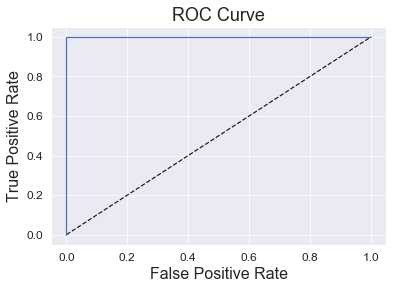

Accuracy: 94.44%

Confusion matrix: 
[[12  0]
 [ 1  5]]

Classification report: 
              precision    recall  f1-score   support

         ALL       0.92      1.00      0.96        12
         AML       1.00      0.83      0.91         6

   micro avg       0.94      0.94      0.94        18
   macro avg       0.96      0.92      0.93        18
weighted avg       0.95      0.94      0.94        18



In [10]:
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

logreg_pipeline = Pipeline(steps=[('normalizer', Normalizer()),('logreg', LogisticRegression(solver='lbfgs'))])

logreg_pipeline.fit(X_train, y_train)
logreg_y_pred = logreg_pipeline.predict(X_test)
y_pred_prob = logreg_pipeline.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='AML')

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print classification metrics
print('Accuracy: {:.2%}\n'.format(logreg_pipeline.score(X_test, y_test)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(y_test, logreg_y_pred)))
print('Classification report: \n{}'.format(classification_report(y_test, logreg_y_pred)))

Support Vector Machine:

In [11]:
from sklearn.svm import SVC

# Initiate SVC pipeline
svc_pipeline = Pipeline(steps=[('normalizer', Normalizer()),('svc', SVC())])

# Set parameters to test
parameters = {'svc__C': [0.01, 0.1, 0.5, 0.75, 1, 1.25, 1.5, 2], 'svc__gamma': [0.01, 0.1, 0.5, 0.75, 1, 1.25, 1.5, 2, 2.5]}

# Perform GridSearch on list of parameters, then fit the model
svc_cv = GridSearchCV(svc_pipeline, param_grid=parameters, cv=5, iid=False)
svc_cv.fit(X_train, y_train)
svc_y_pred = svc_cv.predict(X_test)

# Print out classification metrics
print('Best C is {}'.format(svc_cv.best_params_['svc__C']))
print('Best gamma is {}\n'.format(svc_cv.best_params_['svc__gamma']))
print('Accuracy: {:.2%}\n'.format(svc_cv.score(X_test, y_test)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(y_test, svc_y_pred)))
print('Classification report: \n{}'.format(classification_report(y_test, svc_y_pred)))

Best C is 0.5
Best gamma is 0.5

Accuracy: 94.44%

Confusion matrix: 
[[11  1]
 [ 0  6]]

Classification report: 
              precision    recall  f1-score   support

         ALL       1.00      0.92      0.96        12
         AML       0.86      1.00      0.92         6

   micro avg       0.94      0.94      0.94        18
   macro avg       0.93      0.96      0.94        18
weighted avg       0.95      0.94      0.95        18



Random Forest:
Note: for Random Forest Classifiers, the best value for n_estimators returned by GridSearchCV varies if random_state is not specified

In [12]:
from sklearn.ensemble import RandomForestClassifier
# Initiate RandomForest pipeline
rfc_pipeline = Pipeline(steps=[('normalizer', Normalizer()),('rfc', RandomForestClassifier(random_state=42))])

# Set parameters to test
parameters = {'rfc__n_estimators': [10, 25, 50, 75, 100, 500]}

# Perform GridSearch on list of parameters, then fit the model
rfc_cv = GridSearchCV(rfc_pipeline, param_grid=parameters, cv=5, iid=False, return_train_score=False)

# Fit and predict classifier
rfc_cv.fit(X_train, y_train)
rfc_y_pred = rfc_cv.predict(X_test)

# Print out classification metrics
print('Best n_estimators is: {}\n'.format(rfc_cv.best_params_['rfc__n_estimators']))
print('Accuracy: {:.2%}\n'.format(rfc_cv.score(X_test, y_test)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(y_test, rfc_y_pred)))
print('Classification report: \n{}'.format(classification_report(y_test, rfc_y_pred)))

print(pd.DataFrame(rfc_cv.cv_results_))

Best n_estimators is: 25

Accuracy: 100.00%

Confusion matrix: 
[[12  0]
 [ 0  6]]

Classification report: 
              precision    recall  f1-score   support

         ALL       1.00      1.00      1.00        12
         AML       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.008584      0.001343         0.001782        0.000393   
1       0.015957      0.000892         0.002394        0.000489   
2       0.028524      0.000490         0.003391        0.000489   
3       0.045858      0.005112         0.004903        0.000690   
4       0.059458      0.008079         0.006185        0.000748   
5       0.293062      0.045976         0.030699        0.006668   

  param_rfc__n_estimators                      params  split0_test_score  \
0                  

Using the kNN classifier, I then wanted to assess the smallest subset of genes that could be used to train and fit the classifier without reducing the accuracy of the model:

In [13]:
# Slice out top 10 genes with highest (+) correlation values and highest (-) correlation values
top_10_gene_summary = pd.concat([gene_summary.iloc[0:1, :], gene_summary.iloc[-1:, :]], axis=0).reset_index(drop=True)
# Create a list with the names of the top 10 genes
top_10_gene_names = list(top_10_gene_summary['Gene'])
# Slice out expression data for top 10 genes from training dataset
X_10 = gene_data.loc[:, top_10_gene_names]

# Merge the key dataframe containing the cancer labels with the gene_data dataframe to assign the cancer type to each patient sample
labeled_data = pd.concat([key, gene_data], axis=1, join='inner')

# Pull out just the labels from the labelled data to use for training classifiers
y = labeled_data.cancer

# Split data into train and test sets; stratify split so that AML samples have the same proportion in both train & test sets
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_10, y, test_size=.8, random_state=1582, stratify=y)

# Initiate Normalizer, LogisticRegression, and Pipeline, then fit & predict
logreg_pipeline = Pipeline(steps=[('normalizer', Normalizer()),('logreg', LogisticRegression(solver='lbfgs'))])
logreg_pipeline.fit(X_train_10, y_train_10)
logreg_y_pred = logreg_pipeline.predict(X_test_10)

# Print classification metrics
print('Accuracy: {:.2%}\n'.format(logreg_pipeline.score(X_test_10, y_test_10)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(y_test_10, logreg_y_pred)))
print('Classification report: \n{}'.format(classification_report(y_test_10, logreg_y_pred)))

# Initiate normalizer, kNN Classifier, and pipeline
knn_pipeline = Pipeline(steps=[('normalizer', Normalizer()), ('knn', KNeighborsClassifier())])

# Set list of parameters to test
parameters = {'knn__n_neighbors': np.arange(1, 10)}

# Perform GridSearch on list of parameters, then fit the model
knn_cv = GridSearchCV(knn_pipeline, param_grid=parameters, cv=5, iid=False)
knn_cv.fit(X_train_10, y_train_10)
y_pred_10 = knn_cv.predict(X_test_10)

# Print out classification metrics
print('Best n_neighbors is {}\n'.format(knn_cv.best_params_['knn__n_neighbors']))
print('Accuracy: {:.2%}\n'.format(knn_cv.score(X_test_10, y_test_10)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(y_test_10, y_pred_10)))
print('Classification report: \n{}'.format(classification_report(y_test_10, y_pred_10)))

Accuracy: 79.31%

Confusion matrix: 
[[38  0]
 [12  8]]

Classification report: 
              precision    recall  f1-score   support

         ALL       0.76      1.00      0.86        38
         AML       1.00      0.40      0.57        20

   micro avg       0.79      0.79      0.79        58
   macro avg       0.88      0.70      0.72        58
weighted avg       0.84      0.79      0.76        58

Best n_neighbors is 2

Accuracy: 87.93%

Confusion matrix: 
[[38  0]
 [ 7 13]]

Classification report: 
              precision    recall  f1-score   support

         ALL       0.84      1.00      0.92        38
         AML       1.00      0.65      0.79        20

   micro avg       0.88      0.88      0.88        58
   macro avg       0.92      0.82      0.85        58
weighted avg       0.90      0.88      0.87        58



As all of the models I have tried so far yield the same performance, I would like to try reducing the number of features/dimensions using PCA. First, I will use PCA with the reduced set of 50 genes to determine the intrinsic dimension of the dataset:

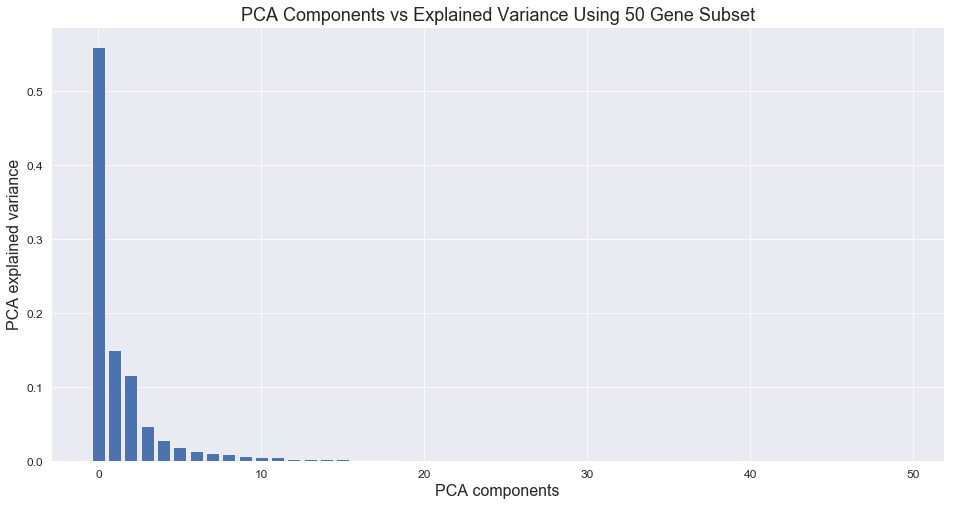

Best n_components is 9


In [14]:
from sklearn.decomposition import PCA

# First, I will investigate the intrinsic dimension of the dataset
# Initiate PCA transformer
pca = PCA()
pca.fit(X_train)

# Plot the PCA components vs. PCA explained varaince
features = range(pca.n_components_)
plt.figure(figsize=(16, 8))
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA components')
plt.ylabel('PCA explained variance')
plt.title('PCA Components vs Explained Variance Using 50 Gene Subset')
plt.savefig(fname='images\PCA_50_genes.png', dpi='figure', format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

# Next, I will optimize the number of components using GridSearchCV
# Initiate Normalizer, PCA transformer, and Pipeline
normalizer = Normalizer()
pca = PCA()
pca_pipeline = Pipeline(steps=[('normalizer', normalizer), ('pca', pca)])

# Set parameters to test
pca_params = {'pca__n_components': np.arange(1, 25)}

# Perform GridSearchCV to optimize parameters, then fit the model
pca_cv = GridSearchCV(pca_pipeline, param_grid=pca_params, cv=5, iid=False)
pca_cv.fit(X_train, y_train)
print('Best n_components is {}'.format(pca_cv.best_params_['pca__n_components']))

Next, I will do the same thing using the full dataset:

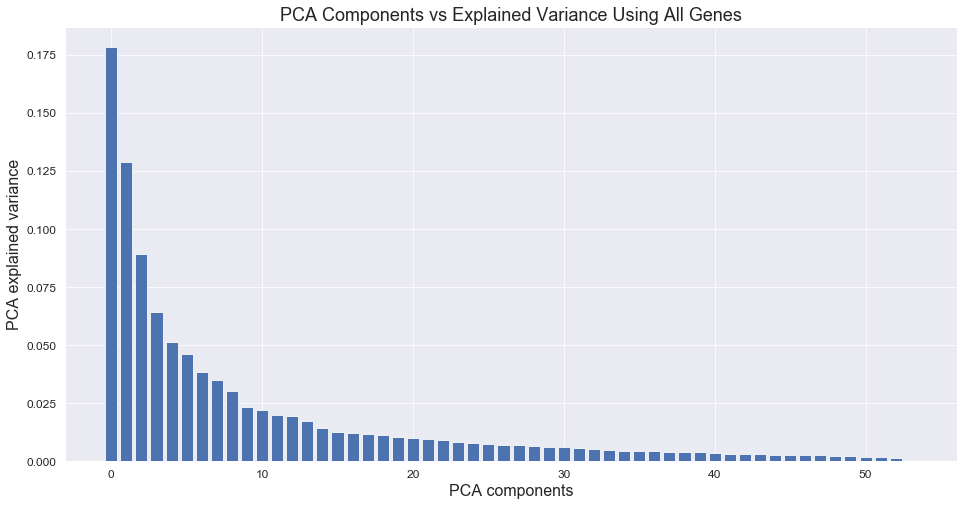

In [15]:
# Split data into train and test sets; stratify split so that AML samples have the same proportion in both train & test sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(gene_data, key['cancer'], test_size=.25, random_state=1582, stratify=y)

# Initiate PCA transformer
pca_all = PCA()
pca_all.fit(X_train_all)

features = range(pca_all.n_components_)
plt.figure(figsize=(16, 8))
plt.bar(features, pca_all.explained_variance_ratio_)
plt.xlabel('PCA components')
plt.ylabel('PCA explained variance')
plt.title('PCA Components vs Explained Variance Using All Genes')
plt.savefig(fname='images\PCA_all_genes.png', dpi='figure', format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

PCA feature reduction of the 50 gene subset, followed by kNN classification:

In [16]:
# Initiate pipeline for normalization, PCA reduction, and k-nearest neighbors classification
normalizer = Normalizer()
pca = PCA()
knn = KNeighborsClassifier()
pca_pipeline = Pipeline(steps=[('normalizer', normalizer), ('pca', pca), ('knn', knn)])

# Set parameters to test with GridSearchCV
pca_params = {'pca__n_components': range(1, 20), 'knn__n_neighbors': range(1, 20)}

# Perform GridSearch on list of parameters, then fit the model
pca_knn_cv = GridSearchCV(pca_pipeline, param_grid=pca_params, cv=5, iid=False)
pca_knn_cv.fit(X_train, y_train)
y_pred_pca = pca_knn_cv.predict(X_test)

# Print out classification metrics
print('Best n_neighbors is {}'.format(pca_knn_cv.best_params_['knn__n_neighbors']))
print('Best n_components is {}\n'.format(pca_knn_cv.best_params_['pca__n_components']))
print('Accuracy: {:.2%}\n'.format(pca_knn_cv.score(X_test, y_test)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(y_test, y_pred_pca)))
print('Classification report: \n{}'.format(classification_report(y_test, y_pred_pca)))

Best n_neighbors is 2
Best n_components is 1

Accuracy: 88.89%

Confusion matrix: 
[[12  0]
 [ 2  4]]

Classification report: 
              precision    recall  f1-score   support

         ALL       0.86      1.00      0.92        12
         AML       1.00      0.67      0.80         6

   micro avg       0.89      0.89      0.89        18
   macro avg       0.93      0.83      0.86        18
weighted avg       0.90      0.89      0.88        18



PCA reduction of the whole 7070 gene dataset, followed by kNN classification:

In [17]:
# Initiate pipeline for normalization, PCA reduction, and k-nearest neighbors classification
normalizer = Normalizer()
pca = PCA()
knn = KNeighborsClassifier()
pca_pipeline = Pipeline(steps=[('normalizer', normalizer), ('pca', pca), ('knn', knn)])

# Set parameters to test with GridSearchCV
pca_params = {'pca__n_components': range(1, 20), 'knn__n_neighbors': np.arange(1, 20)}

# Perform GridSearch on list of parameters, then fit the model
pca_knn_cv = GridSearchCV(pca_pipeline, param_grid=pca_params, cv=5, iid=False)
pca_knn_cv.fit(X_train_all, y_train_all)
y_pred_pca = pca_knn_cv.predict(X_test_all)

# Print out classification metrics
print('Best n_neighbors is {}'.format(pca_knn_cv.best_params_['knn__n_neighbors']))
print('Best n_components is {}\n'.format(pca_knn_cv.best_params_['pca__n_components']))
print('Accuracy: {:.2%}\n'.format(pca_knn_cv.score(X_test_all, y_test_all)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(y_test_all, y_pred_pca)))
print('Classification report: \n{}'.format(classification_report(y_test_all, y_pred_pca)))

#print(pd.DataFrame(pca_knn_cv.cv_results_))

Best n_neighbors is 1
Best n_components is 2

Accuracy: 83.33%

Confusion matrix: 
[[11  1]
 [ 2  4]]

Classification report: 
              precision    recall  f1-score   support

         ALL       0.85      0.92      0.88        12
         AML       0.80      0.67      0.73         6

   micro avg       0.83      0.83      0.83        18
   macro avg       0.82      0.79      0.80        18
weighted avg       0.83      0.83      0.83        18



Finally, a quick test using NMF to reduce the dimension of the 50-gene dataset. GridSearchCV is used to tune n_components and n_neighbors.

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import NMF

# Initiate pipeline for normalization, PCA reduction, and k-nearest neighbors classification
scaler = MinMaxScaler(feature_range=(1,2))
nmf = NMF()
knn = KNeighborsClassifier()
nmf_pipeline = Pipeline(steps=[('scaler', scaler), ('nmf', nmf), ('knn', knn)])

# Set parameters to test with GridSearchCV
nmf_params = {'nmf__n_components': [2,4,6,8,10,12,14,16,18,20], 'knn__n_neighbors': np.arange(1, 20)}

# Perform GridSearch on list of parameters, then fit the model
nmf_knn_cv = GridSearchCV(nmf_pipeline, param_grid=nmf_params, cv=5, iid=False)
nmf_knn_cv.fit(X_train, y_train)
y_pred_nmf = nmf_knn_cv.predict(X_test)

# Print out classification metrics
print('Best n_neighbors is {}'.format(nmf_knn_cv.best_params_['knn__n_neighbors']))
print('Best n_components is {}\n'.format(nmf_knn_cv.best_params_['nmf__n_components']))
print('Accuracy: {:.2%}\n'.format(nmf_knn_cv.score(X_test, y_test)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(y_test, y_pred_nmf)))
print('Classification report: \n{}'.format(classification_report(y_test, y_pred_nmf)))

components_df = pd.DataFrame(nmf_knn_cv.best_estimator_.named_steps.nmf.components_, columns=top_50_gene_names)
print(components_df)

Best n_neighbors is 3
Best n_components is 8

Accuracy: 100.00%

Confusion matrix: 
[[12  0]
 [ 0  6]]

Classification report: 
              precision    recall  f1-score   support

         ALL       1.00      1.00      1.00        12
         AML       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

   M55150_at  U50136_rna1_at  X95735_at  M16038_at  M23197_at  M84526_at  \
0   0.975907        0.900513   0.801871   0.685811   0.685307   0.664782   
1   0.651977        0.615504   0.461377   0.750451   0.308652   0.362456   
2   0.320256        0.430192   0.713663   0.583053   0.867771   0.487244   
3   0.391057        0.210718   0.349166   0.122822   0.264424   0.586123   
4   0.129282        0.435987   0.173000   0.263339   0.285427   0.287710   
5   0.230978        0.138700   0.096955   0.124567   0.214983   0.133375   
6   0.000000 